<a href="https://colab.research.google.com/github/AnikaitLakhotia/Machine-Learning/blob/main/CIFAR_10_Dense_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from matplotlib import pyplot as plt
import os

In [14]:
# Load Data
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_valid, y_valid) = cifar10.load_data()

In [15]:
# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
 restore_best_weights=True)

ReduceOnPlateau = keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=5,
)

root_logdir = os.path.join(os.curdir, "my_logs2")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [16]:
# Model Architecture
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[32,32,3]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
])

In [17]:
# Model Compilation
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [18]:
# Train Model
history = model.fit(x_train, y_train, epochs=50,
 validation_data=(x_valid, y_valid),
 callbacks=[tensorboard_cb,early_stopping_cb,ReduceOnPlateau])

Epoch 1/50
1563/1563 [==============================] - 24s 14ms/step - loss: 1.7198 - accuracy: 0.3937 - val_loss: 1.5310 - val_accuracy: 0.4572 - lr: 0.0100
Epoch 2/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5030 - accuracy: 0.4700 - val_loss: 1.4496 - val_accuracy: 0.4884 - lr: 0.0100
Epoch 3/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4147 - accuracy: 0.5044 - val_loss: 1.4025 - val_accuracy: 0.5073 - lr: 0.0100
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3507 - accuracy: 0.5243 - val_loss: 1.3829 - val_accuracy: 0.5140 - lr: 0.0100
Epoch 5/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.2963 - accuracy: 0.5423 - val_loss: 1.3669 - val_accuracy: 0.5149 - lr: 0.0100
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2522 - accuracy: 0.5584 - val_loss: 1.3646 - val_accuracy: 0.5161 - lr: 0.0100
Epoch 7/50
1563/1563 [========================

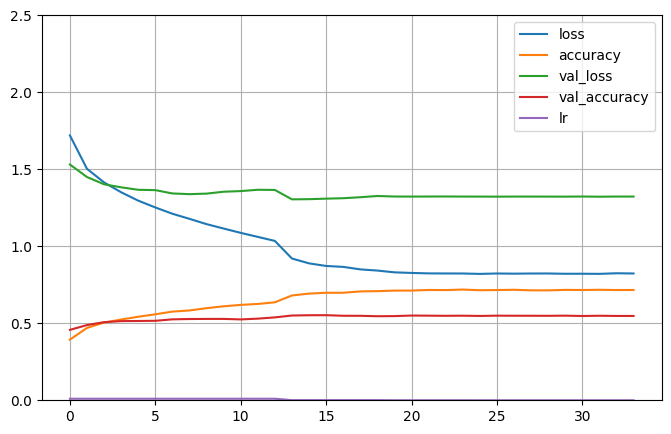

In [19]:
# Plot Data
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5) 
plt.show()